In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
print(os.listdir("../"))

['faceTrain', 'FYP face recog', 'FYP-P1', 'input', 'MLDM', 'NCP', 'NCP-Project', 'NLP', 'ORLDatabase', 'ORLinput', 'ORLTest', 'ORLTrain', 'PDC', 'SICP', 'test', 'train']


In [6]:
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [7]:
os.listdir("../ORLtrain")

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [8]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="../ORLtrain",target_size=(224,224))

Found 57 images belonging to 10 classes.


In [10]:
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="../ORLtest", target_size=(224,224))

Found 36 images belonging to 10 classes.


In [11]:
from keras.applications.vgg16 import VGG16

In [12]:
vggmodel = VGG16(weights='imagenet', include_top=True)

In [13]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
for layers in (vggmodel.layers):
    print(layers)
    layers.trainable = False

In [15]:
X= vggmodel.layers[-2].output

In [16]:
predictions = Dense(10, activation="softmax")(X)

In [17]:
model_final = Model(inputs = vggmodel.input, outputs = predictions)

In [18]:
model_final.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

C:\Users\shakt\anaconda3\envs\vggfacemodel\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [19]:
model_final.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [20]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [30]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')

In [31]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 2, epochs= 5, validation_data= testdata, validation_steps=1, callbacks=[checkpoint,early])

Epoch 1/5
2/2 [==============================] - 1s 756ms/step - loss: 2.0800 - accuracy: 0.2982 - val_loss: 3.0623 - val_accuracy: 0.0625

Epoch 00001: accuracy improved from -inf to 0.29825, saving model to vgg16_1.h5
Epoch 2/5
2/2 [==============================] - 1s 693ms/step - loss: 1.9741 - accuracy: 0.2632 - val_loss: 3.2423 - val_accuracy: 0.0625

Epoch 00002: accuracy did not improve from 0.29825
Epoch 3/5
2/2 [==============================] - 1s 749ms/step - loss: 1.8485 - accuracy: 0.3158 - val_loss: 3.4593 - val_accuracy: 0.0000e+00

Epoch 00003: accuracy improved from 0.29825 to 0.31579, saving model to vgg16_1.h5
Epoch 4/5
2/2 [==============================] - 1s 749ms/step - loss: 1.6810 - accuracy: 0.3860 - val_loss: 3.4571 - val_accuracy: 0.0312

Epoch 00004: accuracy improved from 0.31579 to 0.38596, saving model to vgg16_1.h5
Epoch 5/5
2/2 [==============================] - 1s 746ms/step - loss: 1.4712 - accuracy: 0.4737 - val_loss: 3.3646 - val_accuracy: 0.0000e

In [32]:
model_final.save_weights("vgg16_1.h5")


In [33]:
for e,i in enumerate(os.listdir("../ORLinput/Test")):
    print(i)
    output=[]
    img = image.load_img(os.path.join("../ORLinput/Test",i),target_size=(224,224))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    output = model_final.predict(img)
    print(output)
#     if output[0][0] > output[0][1]:
#         print("A")
# #         df["id"][e]=i
# #         df["label"][e]="cat"
#     else:
#         print("B")
# #         df["id"][e]=i
# #         df["label"][e]="dog

100_10.jpg
[[0.03446361 0.016611   0.11913989 0.01745102 0.01188444 0.03521147
  0.24573034 0.01896155 0.03309604 0.46745062]]
10_1.jpg
[[0.03050304 0.06084248 0.02795632 0.08306099 0.02367211 0.00882624
  0.7284576  0.02476986 0.00130187 0.01060944]]
14_2.jpg
[[7.5701177e-02 2.8445616e-01 5.7817411e-02 1.2315610e-01 1.9669144e-01
  6.8530053e-02 1.4903396e-01 3.3549346e-02 2.5607695e-04 1.0808286e-02]]
18_2.jpg
[[3.2148533e-02 7.0103610e-01 2.6974952e-02 6.4097732e-02 3.2956541e-02
  3.2684974e-02 6.8891600e-02 9.0948939e-03 2.1370292e-04 3.1900913e-02]]
19_2.jpg
[[1.3342737e-02 8.6660427e-01 7.7693346e-03 2.5304303e-02 3.0461648e-02
  2.4429997e-02 2.0611200e-02 6.8974257e-03 2.6669115e-04 4.3124193e-03]]
20_2.jpg
[[2.6117394e-02 6.1405796e-01 1.0857296e-02 5.7728402e-02 3.9161384e-02
  3.6433507e-02 1.3504651e-01 3.2846227e-02 9.8670826e-05 4.7652699e-02]]
24_3.jpg
[[0.10708264 0.08972596 0.14451031 0.08286086 0.12753673 0.08637624
  0.19253528 0.10886078 0.00127553 0.0592357 ]]
28_

In [34]:
# output[0].where(output[0].max())
x = np.where(output[0] == output[0].max())
# output[0]
x = x[0]
print(x)

[6]


In [35]:
for e,i in enumerate(os.listdir("../ORLinput/Test")):
    print(i)
    output=[]
    img = image.load_img(os.path.join("../ORLinput/Test",i),target_size=(224,224))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    output = model_final.predict(img)
    # output[0].where(output[0].max())
    x = np.where(output[0] == output[0].max())
    # output[0]
    x = x[0]
    print(x)

100_10.jpg
[9]
10_1.jpg
[6]
14_2.jpg
[1]
18_2.jpg
[1]
19_2.jpg
[1]
20_2.jpg
[1]
24_3.jpg
[6]
28_3.jpg
[2]
29_3.jpg
[2]
30_3.jpg
[6]
34_4.jpg
[6]
38_4.jpg
[3]
39_4.jpg
[1]
40_4.jpg
[6]
44_5.jpg
[3]
48_5.jpg
[3]
49_5.jpg
[3]
4_1.jpg
[6]
50_5.jpg
[3]
54_6.jpg
[5]
58_6.jpg
[5]
59_6.jpg
[5]
60_6.jpg
[5]
64_7.jpg
[1]
68_7.jpg
[6]
69_7.jpg
[0]
70_7.jpg
[1]
74_8.jpg
[7]
78_8.jpg
[7]
79_8.jpg
[6]
80_8.jpg
[3]
8_1.jpg
[6]
93_9.jpg
[7]
94_9.jpg
[7]
99_10.jpg
[9]
9_1.jpg
[6]


In [36]:
hist

In [37]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

In [40]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

In [44]:
loss

[2.0800349712371826,
 1.9741209745407104,
 1.848515510559082,
 1.6810052394866943,
 1.4712051153182983]

Text(0.5, 1.0, 'Training and Validation Accuracy')

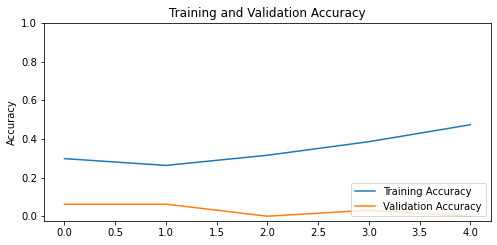

In [42]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

Text(0.5, 0, 'epoch')

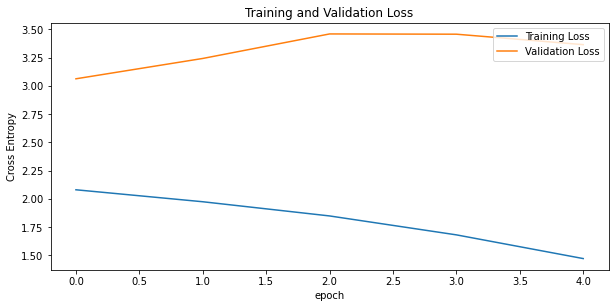

In [49]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
# plt.show()